# Exploring Heart Disease

##  Data source
A popular dataset on Kaggle is the [Heart Disease](https://www.kaggle.com/ronitf/heart-disease-uci) UCI dataset.

## Context

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Content


Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# Prediction with Binary Logistic Regression
## Comment
I will use multinomial logistic regression to predict the target of my data.The two available targets is to suffer from heart disease or not because.As well, i will try logistic regression because the independent variable is categorical and want to find the classification.
## Description
- Understanding my Data
- Train/Test datasets
- Modeling (Logistic Regression with Scikit-learn)
- Prediction
- Evaluation


# Understanding my data

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import my data
df=pd.read_csv("heart.csv")

In [3]:
#the names of my columns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#the shape of dataframe
df.shape

(303, 14)

In [5]:
#some general information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#some information about my DataFrame
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#data type of each column
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
#print the first 6 rows of the dataframe
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [9]:
#calculate the target =0 and 1 respectively
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
#choose all the columns except target
a=df.columns[:-1]

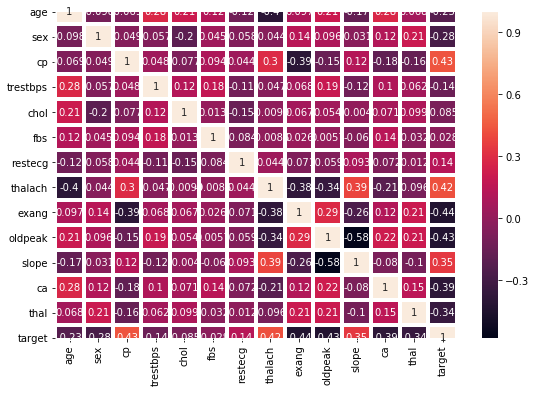

In [11]:
#correlation 
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),annot=True,linewidths=3,)

# Train/Test datasets

In [12]:
#the independent variable 
X = np.asarray(df[a])
X[0:3]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ]])

In [13]:
#the dependent variable
y = np.asarray(df['target'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [14]:
#Standardiation my data (sklearn demand numeric data ) to look normally distributed
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

# Modeling (Logistic Regression with Scikit-learn)

Now we will apply Logistic Regression.To estimate the intersept and slope of my model ,i can use diffirent numerical optimizers such as newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.

In [15]:
#Train the model with 80% of the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
#dimensions of train and test groups
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [16]:
#fit the model..will be created the equation 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction

In [30]:
#predict the dependent variable 
yhat = LR.predict(X_test)
yhat


array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [18]:
#the probability of yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.67873241, 0.32126759],
       [0.41574937, 0.58425063],
       [0.36017634, 0.63982366],
       [0.75013973, 0.24986027],
       [0.30436098, 0.69563902],
       [0.31164893, 0.68835107],
       [0.4582133 , 0.5417867 ],
       [0.88397823, 0.11602177],
       [0.83146596, 0.16853404],
       [0.48902532, 0.51097468],
       [0.39416894, 0.60583106],
       [0.68936106, 0.31063894],
       [0.29193462, 0.70806538],
       [0.73572268, 0.26427732],
       [0.1799858 , 0.8200142 ],
       [0.23870968, 0.76129032],
       [0.16674107, 0.83325893],
       [0.67707246, 0.32292754],
       [0.8171851 , 0.1828149 ],
       [0.81011128, 0.18988872],
       [0.44581175, 0.55418825],
       [0.82695429, 0.17304571],
       [0.65184167, 0.34815833],
       [0.38812608, 0.61187392],
       [0.27184659, 0.72815341],
       [0.3708636 , 0.6291364 ],
       [0.32625444, 0.67374556],
       [0.44814931, 0.55185069],
       [0.79032624, 0.20967376],
       [0.26763453, 0.73236547],
       [0.

In [19]:
#the evaluation of my model
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
#test the KNN with k=7
yhatLOG = LR.predict(X)
yhatLOGproba = LR.predict_proba(X)
LRJaccard = jaccard_similarity_score(y, yhatLOG)
LRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("Avg F1-score: %.4f" % LRF1)
print("LOG Jaccard score: %.4f" % LRJaccard)

LogLoss: : 0.46
Avg F1-score: 0.8440
LOG Jaccard score: 0.8449


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [20]:
#log_loss of model
#In logistic regression, the output can be the probability of having heart disease is yes (or equals to 1).
#This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a 
#classifier where the predicted output is a probability value between 0 and 1. 
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4430552009811294

# K Nearest Neighbor (KNN)

# Comment 
We will try to find the best k for the model.It means the "k" with the highest accuracy.It is a classification model

## Description
   - Train/Test datasets
   - Modeling (KNN Scikit-learn)
   - Prediction
   - Evaluation

# Train/Test datasets

In [21]:
#import some libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
#split the data to train and to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


# Modeling (KNN Scikit-learn)

In [23]:
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

# Prediction

In [24]:
#prediction
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [25]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8512396694214877
Test set Accuracy:  0.8360655737704918


In [26]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7704918 , 0.7704918 , 0.80327869, 0.80327869, 0.80327869,
       0.81967213, 0.83606557, 0.81967213, 0.81967213])

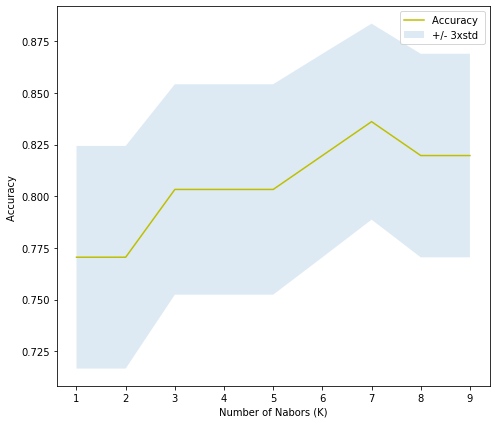

In [37]:
#find with vizualization the max accuracy .
#What value must ne k for the highier accuracy
plt.figure(figsize=(7,6))
plt.plot(range(1,Ks),mean_acc,'y')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.15)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8360655737704918 with k= 7


# Evaluation

In [34]:

yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_similarity_score(y, yhatKNN)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)

Avg F1-score: 0.84
KNN Jaccard Score: 0.84


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
